In [2]:
import sympy as sp
import numpy as np


In [3]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [4]:
from sympy.physics.mechanics import dynamicsymbols

In [5]:
theta0,theta1, theta2,theta3,theta4,theta5,theta6,theta7,Ch,A_r,B_r,H, theta, alpha, a, d = dynamicsymbols('theta0 theta1 theta2 theta3 theta4 theta5 theta6 theta7 Ch A_r B_r H theta alpha a d')


In [6]:
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [34]:
t0=sp.pi
t1=-sp.pi/2
t2=sp.pi/2
t3=-sp.pi/2
t4=0


In [25]:
m00=sp.Matrix([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]])
m_00=m00

In [35]:
m00_= sp.Matrix([[1,0,0,0],
                 [0,1,0,-Ch],
                 [0,0,1,0],
                 [0,0,0,1]])
m0_1 = m.subs({alpha:sp.pi/2, a:0, theta:t0+theta0, d:-0})
m01=m00_*m0_1
m01

Matrix([
[-cos(theta0), 0, -sin(theta0),   0],
[-sin(theta0), 0,  cos(theta0), -Ch],
[           0, 1,            0,   0],
[           0, 0,            0,   1]])

In [8]:
t0=sp.pi
m_01=m01.subs({theta0:t0})
m_01


Matrix([
[-1, 0, 0,   0],
[ 0, 0, 1, -Ch],
[ 0, 1, 0,   0],
[ 0, 0, 0,   1]])

In [36]:
m12 = m.subs({alpha:sp.pi/2, a:0, theta:t1+theta1, d:0})
m12


Matrix([
[ sin(theta1), 0, -cos(theta1), 0],
[-cos(theta1), 0, -sin(theta1), 0],
[           0, 1,            0, 0],
[           0, 0,            0, 1]])

In [37]:
m23 = m.subs({alpha:sp.pi/2, a:0, theta:t2+theta2, d:0})
m23

Matrix([
[-sin(theta2), 0, cos(theta2), 0],
[ cos(theta2), 0, sin(theta2), 0],
[           0, 1,           0, 0],
[           0, 0,           0, 1]])

In [38]:
m34 = m.subs({alpha:sp.pi/2, a:0, theta:t3+theta3,d:A_r})
m34

Matrix([
[ sin(theta3), 0, -cos(theta3),   0],
[-cos(theta3), 0, -sin(theta3),   0],
[           0, 1,            0, A_r],
[           0, 0,            0,   1]])

m04=m0*m34

In [13]:
m54= m.subs({alpha:p.pi/2, a:0, theta:theta4, d:0})

Matrix([
[1, 0, 0, B_r*sin(theta4)],
[0, 1, 0, B_r*cos(theta4)],
[0, 0, 1,               0],
[0, 0, 0,               1]])

In [17]:
m56 = m.subs({alpha:sp.pi/2, a:0, theta:theta5, d:0})
m56

Matrix([
[cos(theta5), 0,  sin(theta5), 0],
[sin(theta5), 0, -cos(theta5), 0],
[          0, 1,            0, 0],
[          0, 0,            0, 1]])

In [16]:
mbee= sp.Matrix([[m02[0,0].simplify(), m02[0,1].simplify(), sp.trigsimp(m02[0,3].simplify())],
                 [m02[1,0].simplify(), m02[1,1].simplify(), sp.trigsimp(m02[1,3].simplify())],
                 [m02[2,0].simplify(), m02[2,1].simplify(), m02[2,2].simplify()]])

mbee


NameError: name 'm02' is not defined

In [18]:
m67 = m.subs({alpha:sp.pi/2, a:0, theta:theta6, d:0})
m67


Matrix([
[cos(theta6), 0,  sin(theta6), 0],
[sin(theta6), 0, -cos(theta6), 0],
[          0, 1,            0, 0],
[          0, 0,            0, 1]])

In [19]:
m78=m.subs({alpha:0, a:0, theta:theta7, d:H})
m78


Matrix([
[cos(theta7), -sin(theta7), 0, 0],
[sin(theta7),  cos(theta7), 0, 0],
[          0,            0, 1, H],
[          0,            0, 0, 1]])

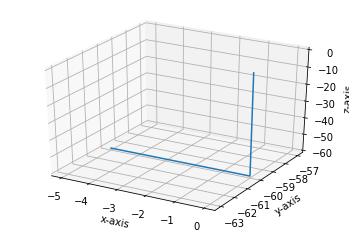

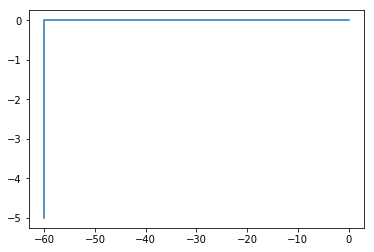

In [99]:
t0=sp.pi
t1=-sp.pi/2
t2=sp.pi/2
t3=-sp.pi/2
t4=-sp.pi/2
t5=0
t6=0
t7=-sp.pi/2

c=60
ar=40
br=20
h=5

m_01=m01.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_01
m02=m01*m12
m_02=m02.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_02
m03=m01*m12*m23
m_03=m03.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_03

m04=m01*m12*m23*m34
m_04=m04.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_04

m05=m01*m12*m23*m34*m45
m_05=m05.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_05

m06=m01*m12*m23*m34*m45*m56
m_06=m06.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_06

m07=m01*m12*m23*m34*m45*m56*m67
m_07=m07.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_07

m08=m01*m12*m23*m34*m45*m56*m67*m78
m_08=m08.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,theta5:t5,theta6:t6,theta7:t7,Ch:c,A_r:ar, B_r:br,H:h})
m_08




import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')


x = [m_01[0,3],m_02[0,3],m_03[0,3],m_04[0,3],m_05[0,3],m_06[0,3],m_07[0,3],m_08[0,3]]
y = [m_01[1,3],m_02[1,3],m_03[1,3],m_04[1,3],m_05[1,3],m_06[1,3],m_07[1,3],m_08[1,3]]
z = [m_01[2,3],m_02[2,3],m_03[2,3],m_04[2,3],m_05[2,3],m_06[2,3],m_07[2,3],m_08[2,3]]
ax.plot3D(x, y, z)
#ax.scatter3D(x, y, z, c=z, cmap='Greens');
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()

fig2 = plt.figure()
plt.plot(z,x)
plt.show()

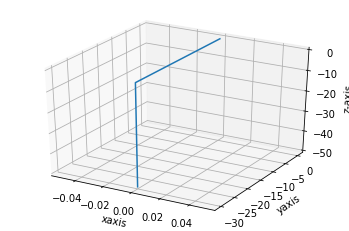

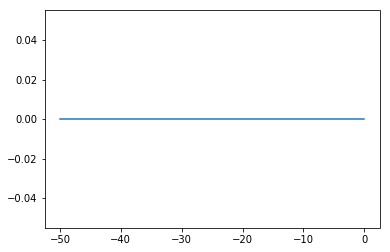

In [33]:
t0=sp.pi
t1=-sp.pi/2
t2=sp.pi/2
t3=-sp.pi/2
t4=0


c=30
ar=30
br=20
h=5

m_01=m01.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,Ch:c,A_r:ar, B_r:br,H:h})
m_01
m02=m01*m12
m_02=m02.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,Ch:c,A_r:ar, B_r:br,H:h})
m_02
m03=m01*m12*m23
m_03=m03.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,Ch:c,A_r:ar, B_r:br,H:h})
m_03

m04=m01*m12*m23*m34
m_04=m04.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,Ch:c,A_r:ar, B_r:br,H:h})
m_04

m0a=m01*m12*m23*m34*m4a
m_0a=m0a.subs({theta0:t0,theta1:t1,theta2:t2, theta3:t3,theta4:t4,Ch:c,A_r:ar, B_r:br,H:h})
m_0a


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')


x = [m_00[0,3],m_01[0,3],m_02[0,3],m_03[0,3],m_04[0,3],m_0a[0,3]]
y = [m_00[1,3],m_01[1,3],m_02[1,3],m_03[1,3],m_04[1,3],m_0a[1,3]]
z = [m_00[2,3],m_01[2,3],m_02[2,3],m_03[2,3],m_04[2,3],m_0a[2,3]]
ax.plot3D(x,y, z)

#ax.scatter3D(x, y, z, c=z, cmap='Greens');
ax.set_xlabel('xaxis')
ax.set_ylabel('yaxis')
ax.set_zlabel('z-axis')

plt.show()

fig2 = plt.figure()
plt.plot(z,x)
plt.show()

In [87]:
m_08

Matrix([
[-1, 0,  0,   0],
[ 0, 1,  0, -60],
[ 0, 0, -1, -65],
[ 0, 0,  0,   1]])

In [91]:
m08

Matrix([
[  ((((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3))*sin(theta5) + (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta5))*cos(theta6) + (-(sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - sin(theta1)*sin(theta3)*cos(theta0))*sin(theta6))*cos(theta7) + (-((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3))*cos(theta5) + (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*sin(theta5))*sin(theta7),   -((((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3))*sin(theta5) + (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta5))*cos(theta6) + (-(sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - sin(theta1)*sin(theta3)*cos(theta0))*sin(theta6))*sin(theta7) + (-((sin(theta0)*sin(theta2) +

In [92]:
mbee= sp.Matrix([[m08[0,0].simplify(), m08[0,1].simplify(), sp.trigsimp(m08[0,3].simplify())],
                 [m08[1,0].simplify(), m08[1,1].simplify(), sp.trigsimp(m08[1,3].simplify())],
                 [m08[2,0].simplify(), m08[2,1].simplify(), m08[2,2].simplify()]])

mbeembee= sp.Matrix([[m08[0,0].simplify(), m08[0,1].simplify(), sp.trigsimp(m08[0,3].simplify())],
                 [m08[1,0].simplify(), m08[1,1].simplify(), sp.trigsimp(m08[1,3].simplify())],
                 [m08[2,0].simplify(), m08[2,1].simplify(), m08[2,2].simplify()]])

mbee


Matrix([
[((((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3))*sin(theta5) + (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta5))*cos(theta6) - ((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta0))*sin(theta6))*cos(theta7) - (((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3))*cos(theta5) - (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*sin(theta5))*sin(theta7), -((((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3))*sin(theta5) + (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta5))*cos(theta6) - ((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta0))*sin(theta6))*sin(theta7) - (((sin(theta0)*sin(theta2) + cos(the

In [102]:
mbee= sp.Matrix([[m0a[0,0].simplify(), m0a[0,1].simplify(), sp.trigsimp(m0a[0,3].simplify())],
                 [m0a[1,0].simplify(), m0a[1,1].simplify(), sp.trigsimp(m0a[1,3].simplify())],
                 [m0a[2,0].simplify(), m0a[2,1].simplify(), m0a[2,2].simplify()]])

mbee

Matrix([
[(sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta0), -sin(theta0)*cos(theta2) + sin(theta2)*cos(theta0)*cos(theta1),      ((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta0))*B_r*sin(theta4) - (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*A_r - (sin(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*B_r*cos(theta4)],
[(sin(theta0)*cos(theta1)*cos(theta2) - sin(theta2)*cos(theta0))*cos(theta3) + sin(theta0)*sin(theta1)*sin(theta3),  sin(theta0)*sin(theta2)*cos(theta1) + cos(theta0)*cos(theta2), ((sin(theta0)*cos(theta1)*cos(theta2) - sin(theta2)*cos(theta0))*cos(theta3) + sin(theta0)*sin(theta1)*sin(theta3))*B_r*sin(theta4) + (sin(theta0)*sin(theta2)*cos(theta1) + cos(theta0)*cos(theta2))*A_r + (sin(theta0)*sin(theta2)*cos(theta1) + cos(theta0)*cos(theta2))*B_r*cos(theta4) - Ch],
[                                                

In [103]:
m0ambee= sp.Matrix([[m08[0,0].simplify(), m08[0,1].simplify(), sp.trigsimp(m08[0,3].simplify())],
                 [m08[1,0].simplify(), m08[1,1].simplify(), sp.trigsimp(m08[1,3].simplify())],
                 [m08[2,0].simplify(), m08[2,1].simplify(), m08[2,2].simplify()]])

mbee

Matrix([
[(sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta0), -sin(theta0)*cos(theta2) + sin(theta2)*cos(theta0)*cos(theta1), (sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) - sin(theta1)*cos(theta0)*cos(theta3),    ((sin(theta0)*sin(theta2) + cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta0))*B_r*sin(theta4) + (-sin(theta0)*cos(theta2) + sin(theta2)*cos(theta0)*cos(theta1))*A_r + (-sin(theta0)*cos(theta2) + sin(theta2)*cos(theta0)*cos(theta1))*B_r*cos(theta4)],
[(sin(theta0)*cos(theta1)*cos(theta2) - sin(theta2)*cos(theta0))*cos(theta3) + sin(theta0)*sin(theta1)*sin(theta3),  sin(theta0)*sin(theta2)*cos(theta1) + cos(theta0)*cos(theta2), (sin(theta0)*cos(theta1)*cos(theta2) - sin(theta2)*cos(theta0))*sin(theta3) - sin(theta0)*sin(theta1)*cos(theta3), ((sin(theta0)*cos(theta1)*cos(theta2) - sin(theta2)*cos(theta0))*cos(theta3) + sin(theta0)*sin(theta1)*sin(the

In [104]:
m_a=m0a.subs({theta0:sp.pi})

In [105]:
m_a

Matrix([
[-sin(theta1)*sin(theta3) - cos(theta1)*cos(theta2)*cos(theta3), -sin(theta2)*cos(theta1), sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2), (-sin(theta1)*sin(theta3) - cos(theta1)*cos(theta2)*cos(theta3))*B_r*sin(theta4) - A_r*sin(theta2)*cos(theta1) - B_r*sin(theta2)*cos(theta1)*cos(theta4)],
[                                       sin(theta2)*cos(theta3),             -cos(theta2),                                       sin(theta2)*sin(theta3),                                                            -A_r*cos(theta2) + B_r*sin(theta2)*sin(theta4)*cos(theta3) - B_r*cos(theta2)*cos(theta4) - Ch],
[ sin(theta1)*cos(theta2)*cos(theta3) - sin(theta3)*cos(theta1),  sin(theta1)*sin(theta2), sin(theta1)*sin(theta3)*cos(theta2) + cos(theta1)*cos(theta3),  (sin(theta1)*cos(theta2)*cos(theta3) - sin(theta3)*cos(theta1))*B_r*sin(theta4) + A_r*sin(theta1)*sin(theta2) + B_r*sin(theta1)*sin(theta2)*cos(theta4)],
[                                                             0,